### Decision Tree

**Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
warnings.simplefilter("ignore", UserWarning)

**Dataset**

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Split** the dataset into train set and test set.

Often time decision tree **overfits** the training set.

train test split helps to identify and **avoid** it.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], 
                                                    df['target'], 
                                                    random_state=0)

**Decision Tree**

In [4]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

Decision tree helps us to find the **important features** that is useful for the model.

In [5]:
print(f'Important Features : {clf.feature_importances_*100}')

Important Features : [ 0.          0.         44.36661359 55.63338641]


Target vector **classes**.

In [6]:
print(f'Classes : {clf.classes_}')

Classes : [0 1 2]


**Prediction** for one observation.

In [7]:
print(f'Prediction for One Observation : {clf.predict(X_test.iloc[0].values.reshape(1,-1))}')

Prediction for One Observation : [2]


Measure model performance ( **Accuracy** )

In [8]:
score = clf.score(X_test, y_test)
print(f'Test Score : {score*100:.2f}%')

Test Score : 89.47%


Finding **optimal** max depth.

In [9]:
max_depth_range = list(range(1,6)) # List of Values to try for Max Depth 

accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

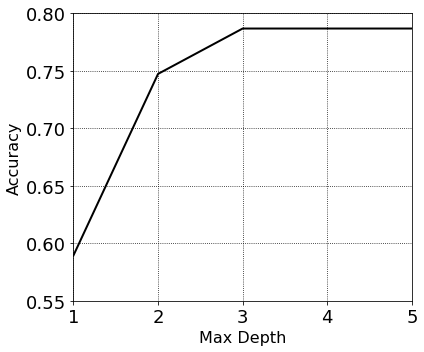

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))

ax.plot(max_depth_range, 
        accuracy, 
        lw=2, 
        color='k')

ax.grid(True, 
        axis='both', 
        zorder=0, 
        linestyle=':', 
        color='k')

yticks =ax.get_yticks()
ytick_list = []

ax.set_xlim([1,5])
ax.set_ylim([0.50, 1.00]) # 50% to 100%

for tick in yticks:
    ytick_list.append(str(tick).ljust(4,'0')[0:4])
ax.set_yticklabels(ytick_list)
ax.tick_params(labelsize=18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Max Depth', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
fig.tight_layout();